[0, 1.1, -1.5, 1.5]

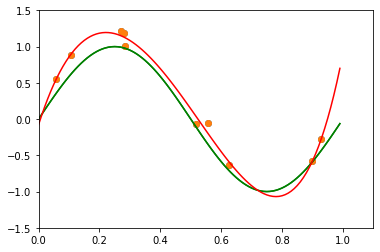

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

NOS=100;
NOT=10;

x = np.arange(0, 1, 0.01);
y = np.sin(2*math.pi*x)
plt.plot(x, y,'g')

x1 = np.random.random(NOT);
x1.sort();
y1=np.sin(2*math.pi*x1)+np.random.random(NOT)*0.3;
#print(y1)

plt.scatter(x1, y1, marker='o')
plt.plot(x, y,'g')

plt.scatter(x1, y1, marker='o')


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=5
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x1.reshape(NOT,1),y1)
plt.plot(x, polyreg.predict(x.reshape(NOS,1)),'r')
plt.axis([0, 1.1, -1.5, 1.5])

[0.47798505 0.15985261 0.159754   0.00605294 0.00559328 0.00547991
 0.00547371 0.00150231 0.00113518]
[0.60496289 0.25482249 0.25466796 0.02580616 0.03107311 0.03714954
 0.03840652 1.10342812 2.95156208]


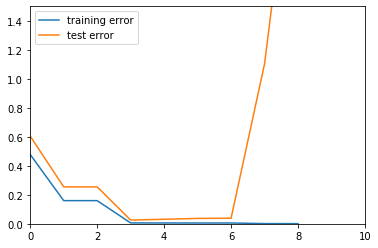

In [12]:
from sklearn.metrics import mean_squared_error
mse_test=np.zeros(9);
mse_train=np.zeros(9);
for k in range(0,9):
    degree=k
    polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    polyreg.fit(x1.reshape(NOT,1),y1)
    mse_train[k]=mean_squared_error(y1, polyreg.predict(x1.reshape(NOT,1)))
    mse_test[k]=mean_squared_error(y, polyreg.predict(x.reshape(NOS,1)))
    
plt.plot(mse_train)
plt.plot(mse_test)
plt.legend(['training error', 'test error'])
plt.axis([0, 10, 0, 1.5])

print(mse_train)
print(mse_test)
